#Tanzania Water Well Prediction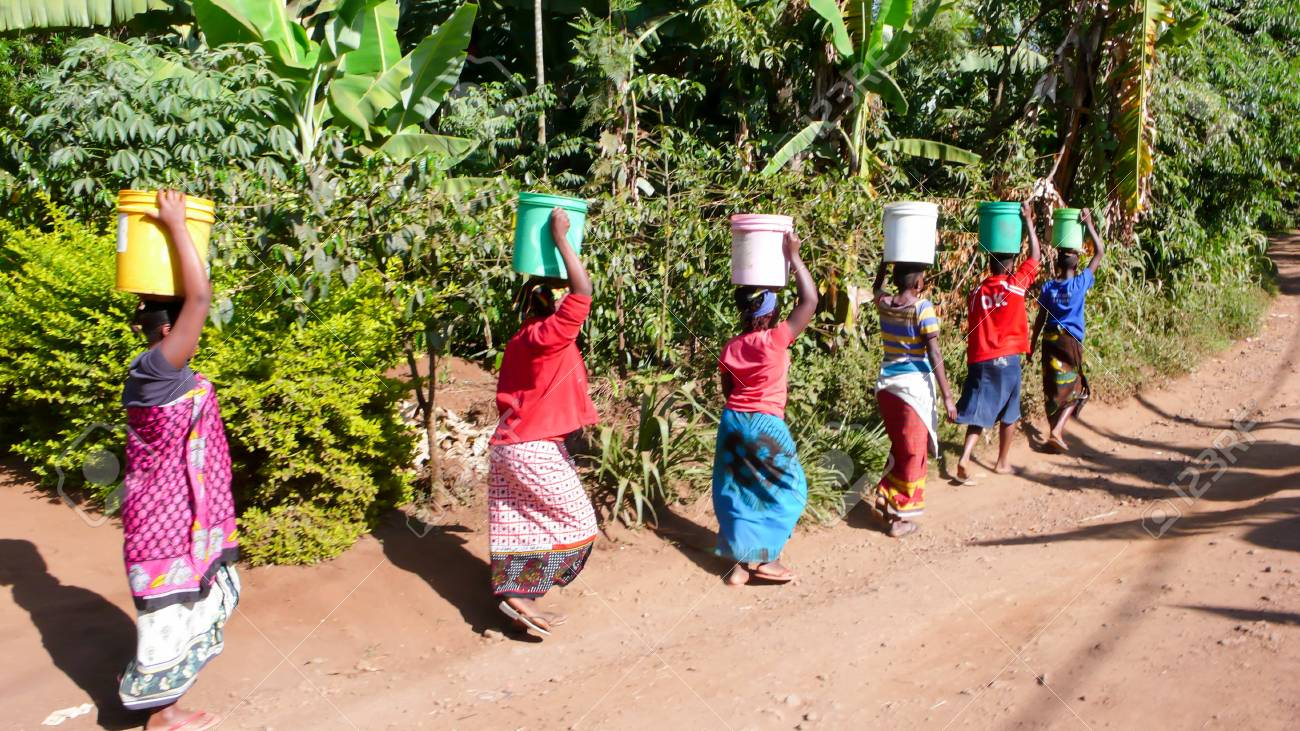

#Business Problem

Tanzania is an East African country situated in the  south of the equator,   While Tanzania has made strides in providing clean water, a large portion of the population still struggles to have access to clean water. Its  Government estimates show only 61% have basic water access. This means many people, especially in the dry season, must rely on potentially unsafe water sources.
Despite having many wells already built, some are broken or unusable. To improve water access for everyone, the Tanzanian government is studying these non-functional wells to learn how to build stronger  and more reliable ones in the future. Their analysis covers data from nearly 60,000 wells across the country.
its  population  is over 570000 and  strides have been made  in providing clean water, a large portion of the population still struggles with access to clean water .The Tanzanian government estimates that only 61% have basic water access while 39% still lacks basic water supply.


#Problem Statement

The UN-Habitat is partnering with Tanzanian funders to tackle the ongoing challenge of clean water access. Despite Tanzania's efforts over the past seven years, an estimated 31,000 preventable deaths occur annually due to inadequate water and sanitation.

The Initiative:
•	Analyze existing well distribution and water pump functionality data.
•	Identify patterns to predict pump functionality.
•	Use these insights to:
o	Proactively schedule maintenance for functional but ailing pumps.
o	Prioritize resource allocation for non-functional water points.

My role here is to pinpoint key factors influencing pump functionality,identify the patterns in functional and non functional wells,predict the functionality of water pumps based on the features provided. This will empower stakeholders to predict maintenance needs and strategically allocate resources, ultimately saving lives and improving public health

#Data


The original data was obtained from the DrivenData 'Pump it Up: Data Mining the Water Table' competition. Basically, there are 4 different data sets; submission format, training set, test set and train labels set which contains status of wells. With the training set and labels set,  my main duty is to   build predictive model and apply it to test set to determine status of the wells

#Data Understanding

In [1]:
    #Data
import numpy as np
import pandas as pd

 #Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Train test split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#Understanding functions
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, mean_squared_error
from sklearn.metrics import confusion_matrix

 #Algoriths
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

Load Data

In [2]:
#loading training set values and training set labels data
def read_data(path):
  data = pd.read_csv(path)
  return data
df1 =read_data('/content/training_set_values (2).csv')
df2 =read_data('/content/training_set_labels.csv')

Explanation:
loading training sets  is the first step towards building powerful machine learning models. By providing the model with labeled examples, it can learn the relationships between features and target variables, ultimately enabling it to make predictions on new data.

In [3]:
#combining the dataset together as one
def combined_dataframe(data_0, data_1):

    """ A simple function to combine the two datasets using the id column present in both datasets """

    new_df = data_0.set_index('id').join(data_1.set_index('id'))

    return new_df

df = combined_dataframe(df1, df2)
df.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


Explanation:
by combining datasets we can unlock valuable insights from the data and adress complex problems that would be possible with individual datasets

In [4]:
#checking for the relevants columns in the dataset
def read_columns(data):

    columns = data.columns

    return columns


read_columns(df)

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'recorded_by', 'scheme_management',
       'scheme_name', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

Explanation

we check for columns to ensure data quality and facilitate exploration and understanding of the dataset

In [5]:
#previewing the shape of our dataframe
def get_info_shape(data):

    print(f'The shape of our dataset is: {data.shape}')
    print(f'with {data.shape[0]} number of rows')
    print(f'and {data.shape[1]} columns')
    print('********************************************************')
    print('********************************************************')
    print(data.info())


get_info_shape(df)

The shape of our dataset is: (59400, 40)
with 59400 number of rows
and 40 columns
********************************************************
********************************************************
<class 'pandas.core.frame.DataFrame'>
Index: 59400 entries, 69572 to 26348
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55763 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59398 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region         

Explanation
we preview the shape so as to display the number of observations(rows) and features (columns) in the dataset

In [6]:
#performing statistical analysis
def statistical_analysis(data):

    return data.describe()

statistical_analysis(df)

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


Explanation

statistical analysis is performed to show different data types

In [7]:
#checking the data types in our dataset
def data_types(data):

    print("Our dataset has", len( data.select_dtypes(include='number').columns),
                "numeric columns")

    print("and", len(data.select_dtypes(include='object').columns),
          "categorical columns")
    print('Numerical Columns:', data.select_dtypes(include='number').columns)
    print('Categorical Coulumns:', data.select_dtypes(include='object').columns)

data_types(df)

Our dataset has 9 numeric columns
and 31 categorical columns
Numerical Columns: Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private',
       'region_code', 'district_code', 'population', 'construction_year'],
      dtype='object')
Categorical Coulumns: Index(['date_recorded', 'funder', 'installer', 'wpt_name', 'basin',
       'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')


From the above analysis the number of rows we have will favour our modelling

#Data Cleaning

In [8]:
#check duplicates
duplicates = []

def check_duplicates(data):
  for i in data.duplicated():
        duplicates.append(i)
duplicates_set = set(duplicates)
if(len(duplicates_set) == 1):
        print('Our Dataset has no Duplicates')

else:
    duplicates_percentage = np.round(((sum(duplicates)/len(df)) * 100 ), 2)
    print(f'Duplicated rows constitute of {duplicates_percentage} % of our dataset')


check_duplicates(df)

Duplicated rows constitute of 0.0 % of our dataset


In [9]:
#droping duplicated values
def drop_duplicates(data):

    data = data.drop_duplicates(inplace = True)

    return data

drop_duplicates(df)

In [10]:
# viewing the shape of our df after dropping some values
def shape(data):

    # Get the shape of the data
    data_shape = data.shape

    # Return the shape
    return data_shape

# Call the shape function with the df
shape(df)

(59364, 40)

Outliers

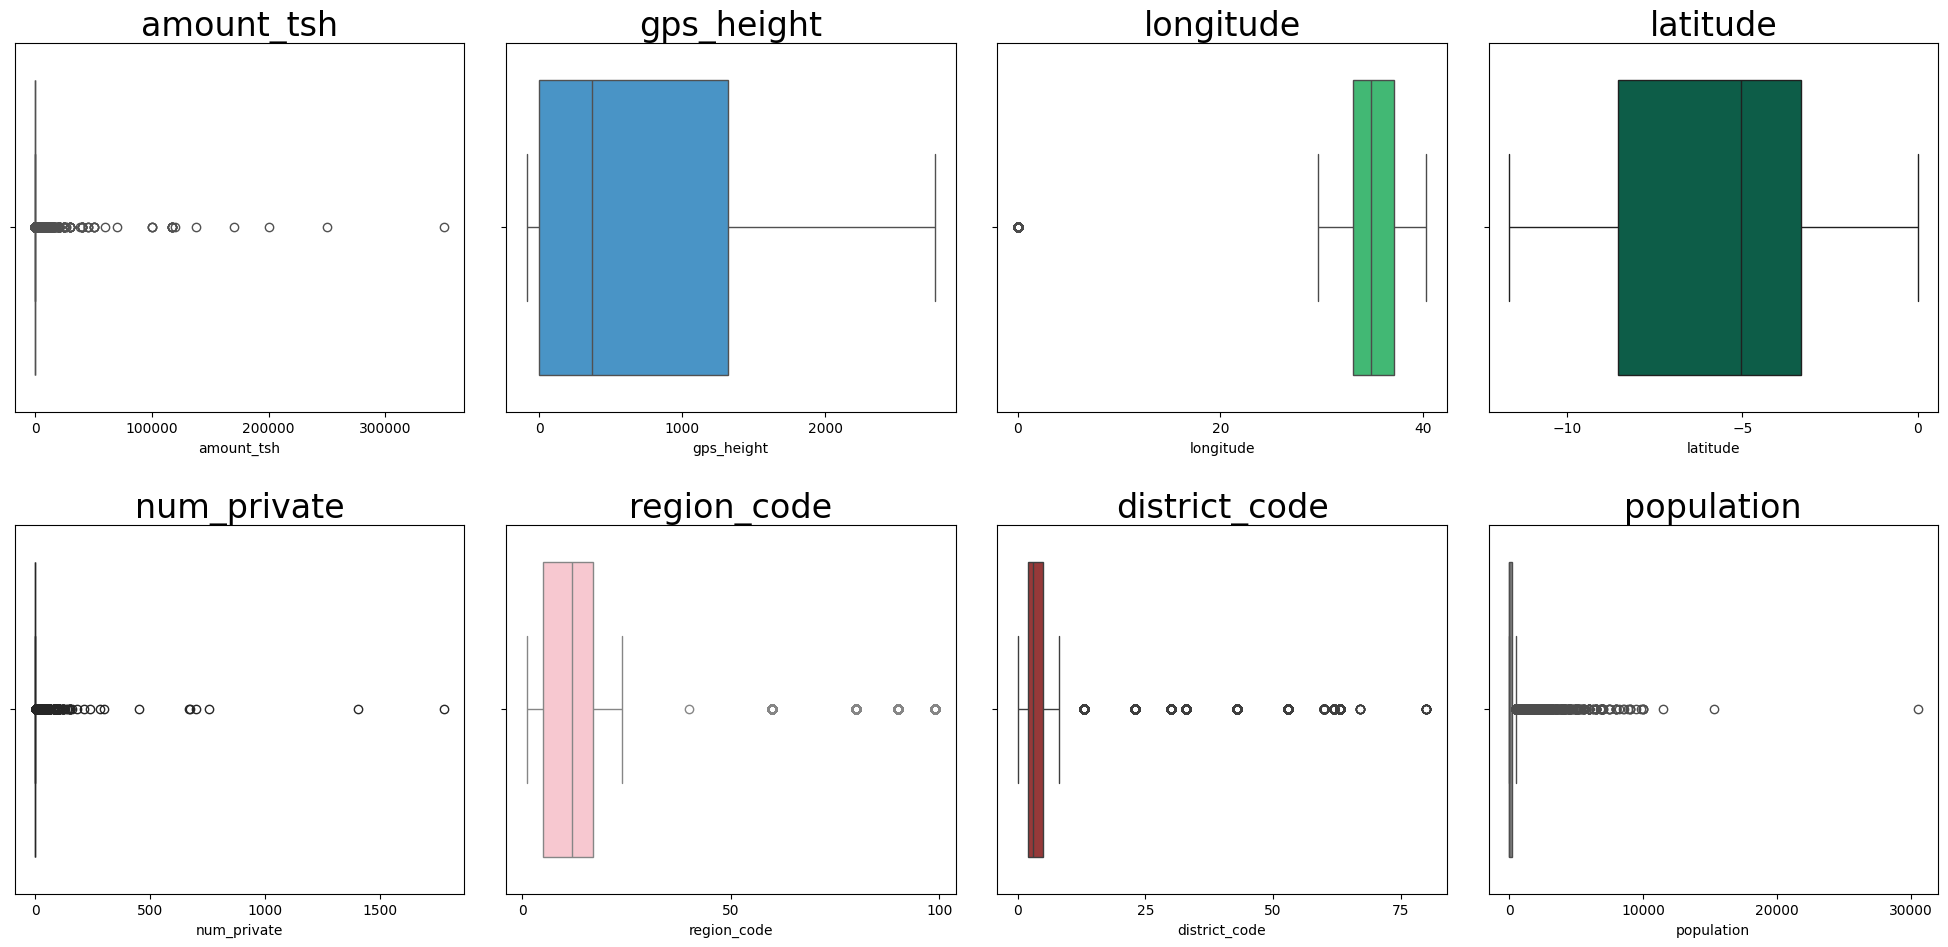

In [11]:
#checking and visualising outliers in our numerical data
def plot_boxplots(data, cols):
    fig, axes = plt.subplots(2, 4, figsize=(20,10))
    axes = axes.ravel()
    sns.set(font_scale=2.0)

    colors = ["#9b59b6", "#3498db", "#2ecc71", "#006a4e", 'purple', 'pink', 'brown', 'gray']

    for i, col in enumerate(cols[:8]):

        # convert the x-axis variable to a numeric data type

        data[col] = data[col].astype(float)
        sns.boxplot(x=data[col], ax=axes[i], color=colors[i])

        axes[i].set_title(col)
    plt.tight_layout()

# specify the columns to plot

cols = df.select_dtypes(include='number').columns


plot_boxplots(df, cols)

As per our visualization we see that we have outliers present in the amount_tsh column, num_private column, region and district code column and the population. We will not delve much into the region code and the division code, these are international standard denomination for country subdivisions that have already been established.For the num_private column we will further explore our data to determine whether the outliers are valid when we will be performing explatory data analysis.Amount Total Static Head (amount_tsh), measures the total vertical distance that a pump raises water. In simpler terms we can also say its the pressure at a specific point in the system. The oultiers on the amount_tsh might be valid . There are a true reflection of the pressure a water pump can generate. It is possibe to even have a Total Static Head of 350000.0 which is the maximum value on the column. We will also explore this further by plotting a violin plot to check the distribution. Its possible to have a population of even 30,000 people so we will not explore this. Therefore we will not be doing any outlier treatment.

Missing Values

In [12]:
def missing_values(data):

    missing_values = data.isnull().sum().sort_values(ascending=False)

    missing_val_percent = ((data.isnull().sum()/len(data)).sort_values(ascending=False))
    missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage %': missing_val_percent})

    return missing_df[missing_df['Percentage %'] > 0]

missing_values(df)

,Missing Values,Percentage %
scheme_name,28783,0.484856
scheme_management,3878,0.065326
installer,3655,0.061569
funder,3637,0.061266
public_meeting,3314,0.055825
permit,3056,0.051479
subvillage,371,0.006250
wpt_name,2,0.000034


Our main focus will be on the missing values in columns scheme_name,scheme_management,installer,funder and public meeting

#scheme name and scheme management


The main objective of our project is to be able to identify patterns in our datasets that will enable us predict faulty water pumps. These two features do not contribute towards that. The only information they give us is what to call the scheme and who manages it, this is not enough to identify whether we have faulty water pumps. For this reason, we will go ahead and drop this columns. In addition to that scheme name contains about 47 percentage of missing values , which is almost half our dataset. Its only correct we drop the column.

In [13]:
#dropping columns
# dropping the columns

def dropping_columns(columns):

    drop_column = df.drop(columns=columns, inplace = True)

    return drop_column

columns_to_drop = df[['scheme_name', 'scheme_management']]

dropping_columns(columns_to_drop)

In [14]:
shape(df)

(59364, 38)

#Installer

The percentage of missing data in this column is quite low. After analysing and successfully creating predictions from our dataset. we are to generate reccomendations to our stakeholders. Such a reccomendation may be advising our stakeholders on the best contractor to do water pump installations. Choice of installers can greatly contribute to the durability of water pumps. Factors such as seating, damaged seal, or misaligned gasket can mean the water pump is not operating efficiently. Therefore reccomending installers is commendable here. In this case we will only drop the rows with the missing values.

#Funder

This refers to the organisation that donated the pumps. We want to advise our stakeholder on who it should collaborate with to raise maximum funds towards the initiative therefore we will just drop the rows with the missing values

#Public Meeting

Public meetings are a way of the community to come together and raise issues of concern. We will also just drop missing values of the column.

In [15]:
#dropping rows with missing values from culumn installer,funder and public meeting
def drop_rows(data, columns):

    new_data = data.dropna(subset=columns, inplace=True)

    return new_data

col = ['installer', 'funder', 'public_meeting']

drop_rows(df, col)
shape(df)

(52560, 38)

Irrelevant Columns to be dropped

The following columns do not seem relevant to our business problem and therefore we will go ahead and drop them

1.Permit
2.Subvillage
3.wpt_name
4.region_code
5.district_code
6.lga
7.ward
8.recorded_by
9.date_recorded
Note : we can use latitudes and longitudes to map our regions therefore we do not need additional columns with geographical information.

Some columns are good for exploratory data analysis just to get a feel of our data , we will not be dropping those however we will not use some of them during modelling .

In [16]:
irrelevant_columns = df[['permit', 'subvillage', 'wpt_name', 'region_code', 'district_code', 'lga', 'ward', 'recorded_by', 'date_recorded']]

dropping_columns(irrelevant_columns)

Checking for mispellings after cleaning the dataset

In [17]:
# tallying up unique responses in our dataset

def tally(column):

    groupings = column.value_counts()

    return groupings

print(tally(df.payment))
print(tally(df.payment_type))

payment
never pay                22712
pay per bucket            8311
pay monthly               8009
unknown                   5205
pay when scheme fails     3850
pay annually              3513
other                      960
Name: count, dtype: int64
payment_type
never pay     22712
per bucket     8311
monthly        8009
unknown        5205
on failure     3850
annually       3513
other           960
Name: count, dtype: int64


In [18]:
#dropping the payment column coz the totals were same
payment_col = df[['payment']]

dropping_columns(payment_col)

Water Quality and Quality Group

In [19]:
print(tally(df.water_quality))
print(tally(df.quality_group))

water_quality
soft                  45598
salty                  4429
unknown                1009
milky                   717
coloured                379
salty abandoned         239
fluoride                173
fluoride abandoned       16
Name: count, dtype: int64
quality_group
good        45598
salty        4668
unknown      1009
milky         717
colored       379
fluoride      189
Name: count, dtype: int64


Explanation

the water quality column we notice that quality group combined both flouride  and flouride abandoned to form just flouride and the same happened to salty and salty abandoned to form just salty.and therefore it was wise to drop quality group

In [20]:
quality_grp = df[['quality_group']]

dropping_columns(quality_grp)

Quantity and Quantity Group

In [21]:
print(tally(df.quantity))
print(tally(df.quantity_group))

quantity
enough          30156
insufficient    13413
dry              5367
seasonal         3235
unknown           389
Name: count, dtype: int64
quantity_group
enough          30156
insufficient    13413
dry              5367
seasonal         3235
unknown           389
Name: count, dtype: int64


both columns have the same totals

In [22]:
quantity_grp = df[['quantity_group']]

dropping_columns(quantity_grp)

Source and Source type Source class

In [23]:
print(tally(df.source))
print(tally(df.source_type))
print(tally(df.source_class))

source
spring                  15236
shallow well            15037
machine dbh              9506
river                    8646
rainwater harvesting     1894
hand dtw                  784
lake                      624
dam                       603
other                     195
unknown                    35
Name: count, dtype: int64
source_type
spring                  15236
shallow well            15037
borehole                10290
river/lake               9270
rainwater harvesting     1894
dam                       603
other                     230
Name: count, dtype: int64
source_class
groundwater    40563
surface        11767
unknown          230
Name: count, dtype: int64


In [24]:
#dropping columns and source class
water_source_col = df[['source', 'source_class']]

dropping_columns(water_source_col)

Water point and Water point type group

In [25]:
print(tally(df.waterpoint_type))
print(tally(df.waterpoint_type_group))

waterpoint_type
communal standpipe             24544
hand pump                      15777
communal standpipe multiple     5778
other                           5617
improved spring                  730
cattle trough                    107
dam                                7
Name: count, dtype: int64
waterpoint_type_group
communal standpipe    30322
hand pump             15777
other                  5617
improved spring         730
cattle trough           107
dam                       7
Name: count, dtype: int64


In [26]:
#dropping waterpoint type
waterpoint_type_col = df[['waterpoint_type']]

dropping_columns(waterpoint_type_col)

Management and management type

In [27]:
print(tally(df.management))
print(tally(df.management_group))

management
vwc                 36424
wug                  5516
water board          2674
wua                  2295
private operator     1655
parastatal           1371
water authority       810
other                 682
company               662
unknown               295
other - school         99
trust                  77
Name: count, dtype: int64
management_group
user-group    46909
commercial     3204
parastatal     1371
other           781
unknown         295
Name: count, dtype: int64


In [28]:
#dropping management_group
management_group_col = df[['management_group']]

dropping_columns(management_group_col)

Exraction type,extraction type group and extraction type class

In [29]:
print(tally(df.extraction_type))
print(tally(df.extraction_type_class))
print(tally(df.extraction_type_group))

extraction_type
gravity                      23759
nira/tanira                   7231
other                         5597
submersible                   3913
swn 80                        3431
mono                          2514
india mark ii                 2257
afridev                       1522
ksb                           1334
other - rope pump              344
other - swn 81                 206
windmill                       111
cemo                            90
india mark iii                  88
other - play pump               84
walimi                          46
climax                          32
other - mkulima/shinyanga        1
Name: count, dtype: int64
extraction_type_class
gravity         23759
handpump        14866
other            5597
submersible      5247
motorpump        2636
rope pump         344
wind-powered      111
Name: count, dtype: int64
extraction_type_group
gravity            23759
nira/tanira         7231
other               5597
submersible         5247
swn 

In [30]:
#dropping extraction type and extraction type column
extraction_col = df[['extraction_type', 'extraction_type_class']]

dropping_columns(extraction_col)

All columns that seem to have similar information have been dropped

#Installer Column

this columns seems to have some spelling issues and different syntax between same categories so its our duty to replace the spelling mistakes and have same categories in same same

In [31]:
df['installer'].replace(to_replace = ('District Water Department', 'District water depar','Distric Water Department'),
                        value ='District water department' , inplace=True)

df['installer'].replace(to_replace = ('FinW','Fini water','FINI WATER'), value ='Fini Water' , inplace=True)
df['installer'].replace(to_replace = 'JAICA', value ='Jaica' , inplace=True)

df['installer'].replace(to_replace = ('COUN', 'District COUNCIL', 'DISTRICT COUNCIL','District Counci',
                                  'District Council','Council','Counc','District  Council','Distri'),
                                 value ='District council' , inplace=True)

df['installer'].replace(to_replace = ('RC CHURCH', 'RC Churc', 'RC','RC Ch','RC C', 'RC CH','RC church',
                                   'RC CATHORIC',) , value ='RC Church' , inplace=True)

df['installer'].replace(to_replace = ('Central Government','Tanzania Government',
                                    'central government','Cental Government', 'Cebtral Government',
                                  'Tanzanian Government','Tanzania government', 'Centra Government' ,
                                    'CENTRAL GOVERNMENT', 'TANZANIAN GOVERNMENT','Central govt', 'Centr',
                                    'Centra govt') , value ='Central government' , inplace=True)

df['installer'].replace(to_replace = ('World vision', 'World Division','World Vision'),
                                      value ='world vision' , inplace=True)

df['installer'].replace(to_replace = ('Unisef','UNICEF'),value ='Unicef' , inplace=True)
df['installer'].replace(to_replace = 'DANID', value ='DANIDA' , inplace=True)

df['installer'].replace(to_replace = ('villigers', 'villager', 'Villagers', 'Villa', 'Village', 'Villi',
                                    'Village Council','Village Counil', 'Villages', 'Vill', 'Village community',
                                    'Villaers', 'Village Community', 'Villag','Villege Council', 'Village council',
                                    'Village  Council','Villagerd', 'Villager', 'Village Technician',
                                    'Village Office','Village community members'),
                                     value ='villagers' , inplace=True)

df['installer'].replace(to_replace =('Commu','Communit','commu','COMMU', 'COMMUNITY') ,
                                      value ='Community' , inplace=True)
df['installer'].replace(to_replace = ('GOVERNMENT', 'GOVER', 'GOVERNME', 'GOVERM','GOVERN','Gover','Gove',
                                      'Governme','Governmen' ) ,value ='Government' , inplace=True)

df['installer'].replace(to_replace = 'Hesawa' ,value ='HESAWA' , inplace=True)

df['installer'].replace(to_replace = ('Colonial Government') , value ='Colonial government' , inplace=True)

df['installer'].replace(to_replace = ('Government of Misri') , value ='Misri Government' , inplace=True)

df['installer'].replace(to_replace = ('Italy government') , value ='Italian government' , inplace=True)

df['installer'].replace(to_replace = ('British colonial government') , value ='British government' , inplace=True)

df['installer'].replace(to_replace = ('Concern /government') , value ='Concern/Government' , inplace=True)

df['installer'].replace(to_replace = ('Village Government') , value ='Village government' , inplace=True)

df['installer'].replace(to_replace = ('Government and Community') , value ='Government /Community' , inplace=True)

df['installer'].replace(to_replace = ('Cetral government /RC') , value ='RC church/Central Gover' , inplace=True)

df['installer'].replace(to_replace = ('Government /TCRS','Government/TCRS') , value ='TCRS /Government' , inplace=True)

df['installer'].replace(to_replace = ('ADRA /Government') , value ='ADRA/Government' , inplace=True)

Now we have clean data our next majo step is exploratory data analysis which is a crucial process of performing investigations on our data to discover pattens to check assumptions with the help of summary statistics and graphical representations

#Exploratory Data Analysis

We will perform the different types of exploratory data analysis

1.Univariate non graphic analysis-which is exploring data that has only variable in a dataset and separately looking at the range of values and the main purpose is to identify data and find patterns that exist in it

2.Bivariate,graphic analysis:here we will get to explore two variables to be able to determine the relationship between them and we have to take note non graphical methods do not provide a complete picture of the data and some of the common bivariate chart types are root and leaf plots,histograms and box charts

Funder Distribution

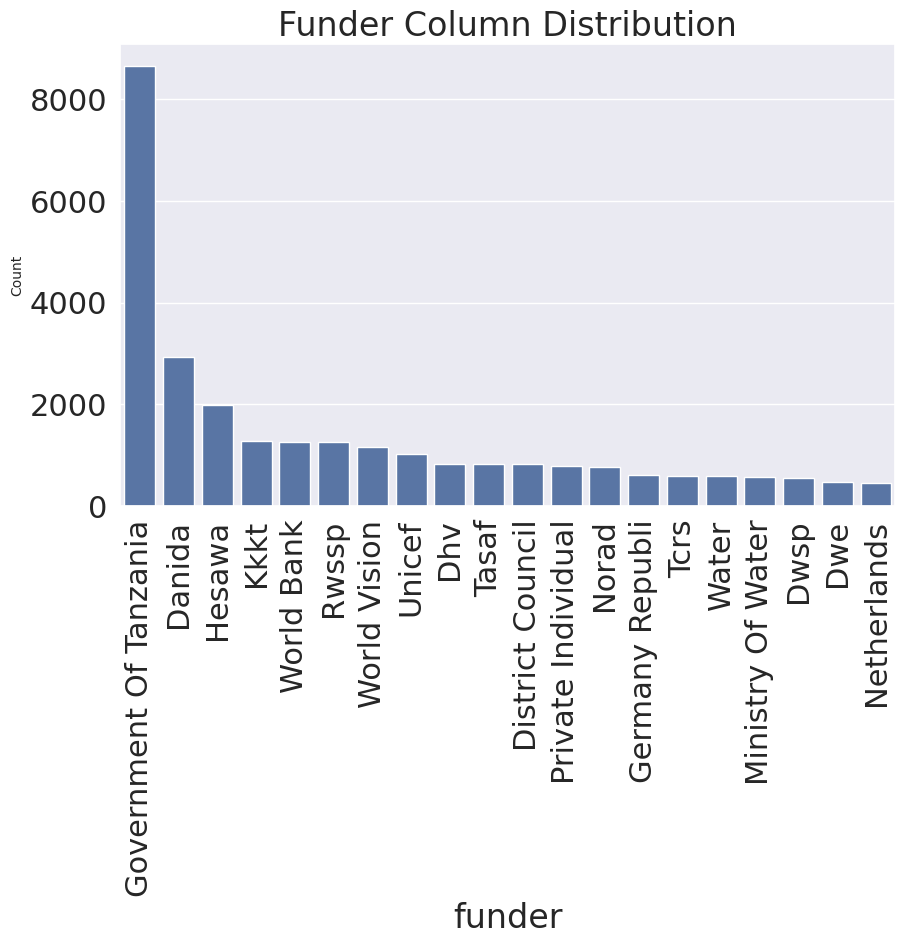

In [32]:
#this acts to plot distibution
def plot_data(data, col, title):
    fig, ax = plt.subplots(figsize=(10, 6))

    column_groupings = tally(data[col])
    sns.barplot(x=column_groupings.head(20).index, y=column_groupings.head(20))
    plt.title(title)
    plt.xticks(rotation=90)
    plt.ylabel('Count', fontsize=10)


plot_data(df, 'funder', 'Funder Column Distribution')

We can conlude that most wells in Tanzania are funded by the government of tanzania followed by Danida then Hesawa

Installer Distribution

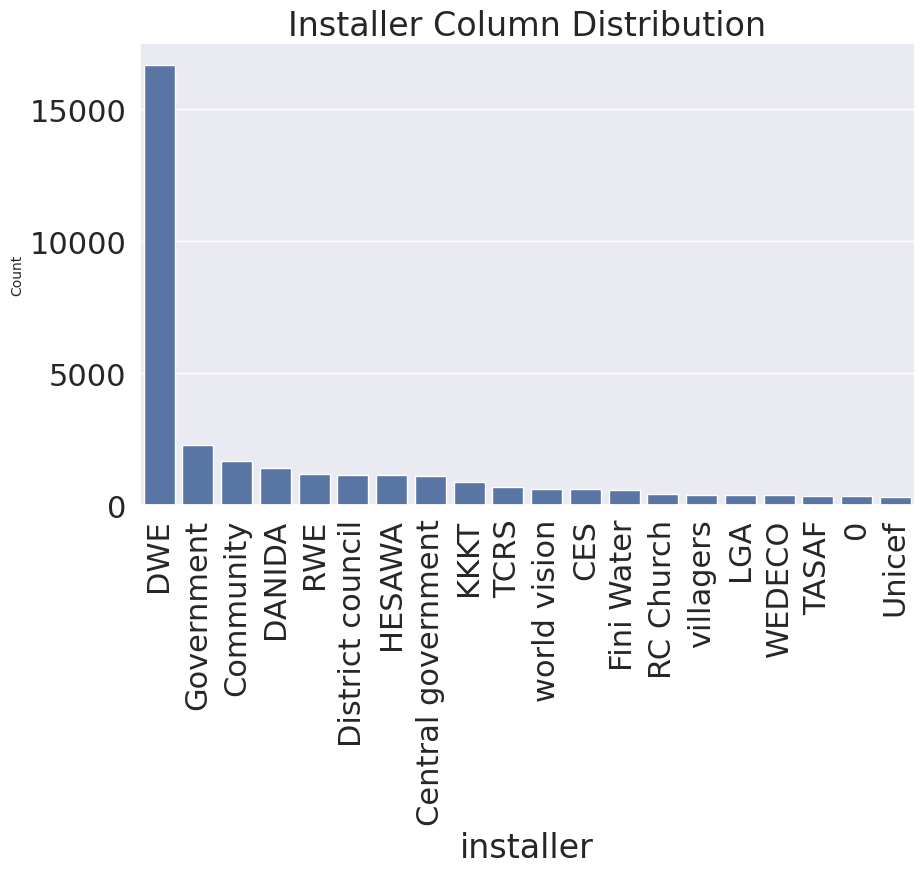

In [33]:
plot_data(df, 'installer', 'Installer Column Distribution')

We can conclude that most of the water pump installation are done by an organisation called DWE,then government comes in second and then the community comesin third in the water pump installations

Water Point Type Distribution

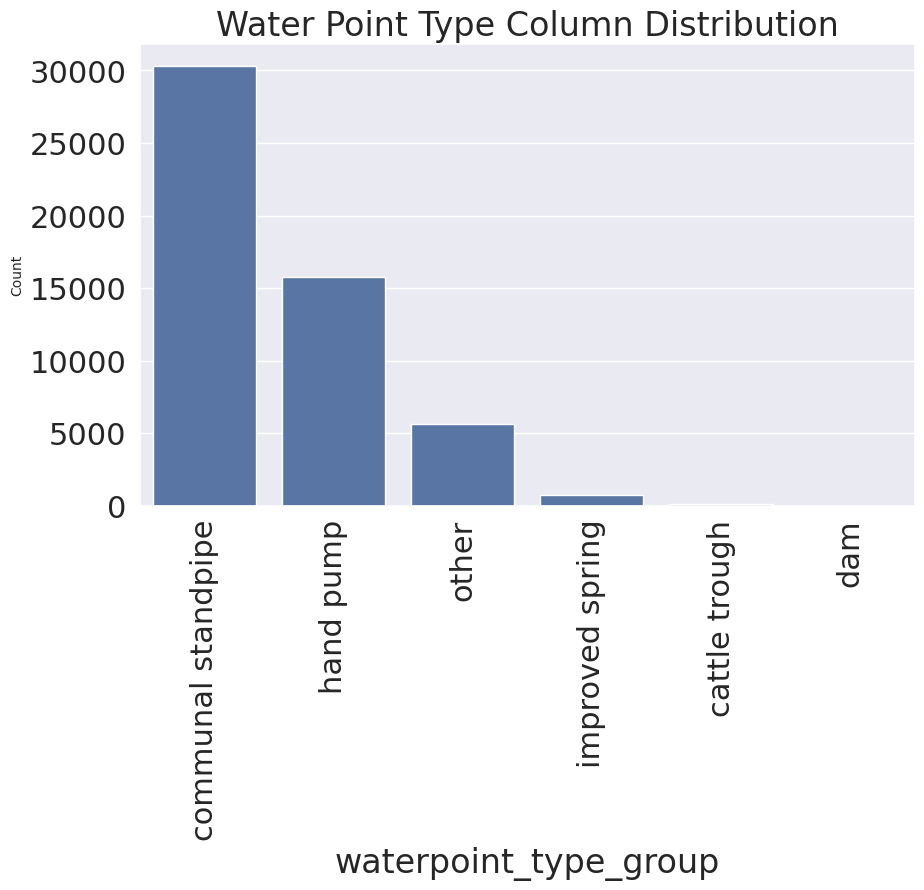

In [34]:
plot_data(df, 'waterpoint_type_group', 'Water Point Type Column Distribution')

We can conclude that most communities in Tanzania use communal standpipe to  pump their water

Water Source Distribution

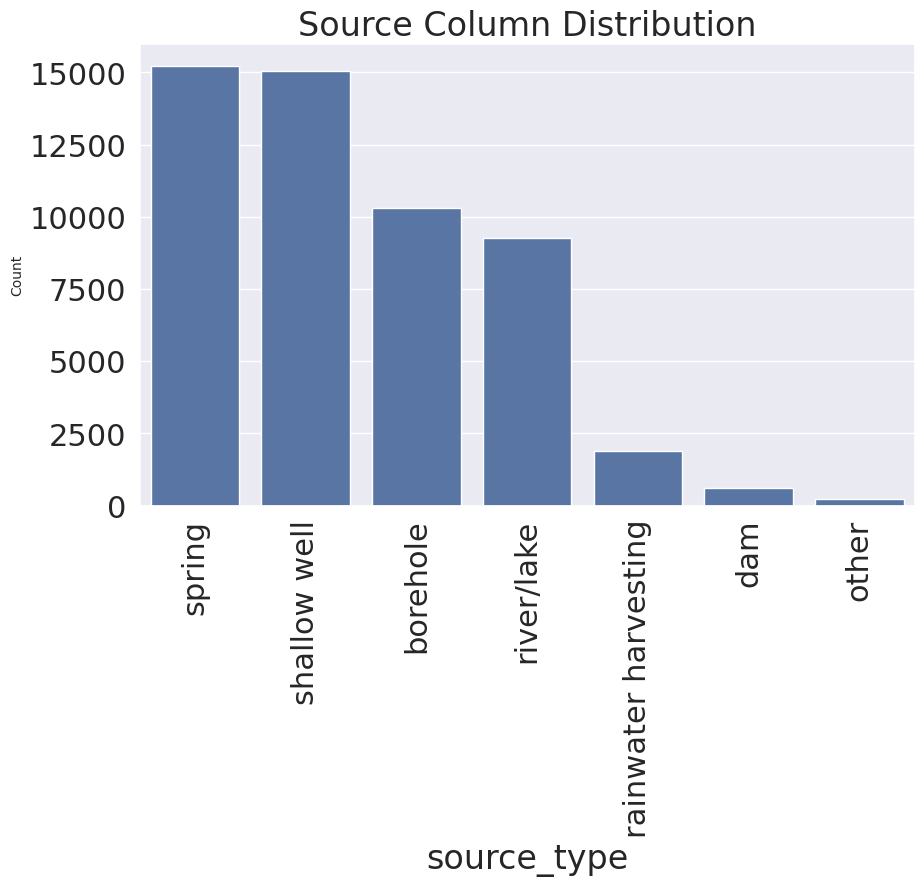

In [35]:
plot_data(df, 'source_type', 'Source Column Distribution')

We can conclude that in Tanzania springs well and boreholes are the main sources of water

Management Distribution

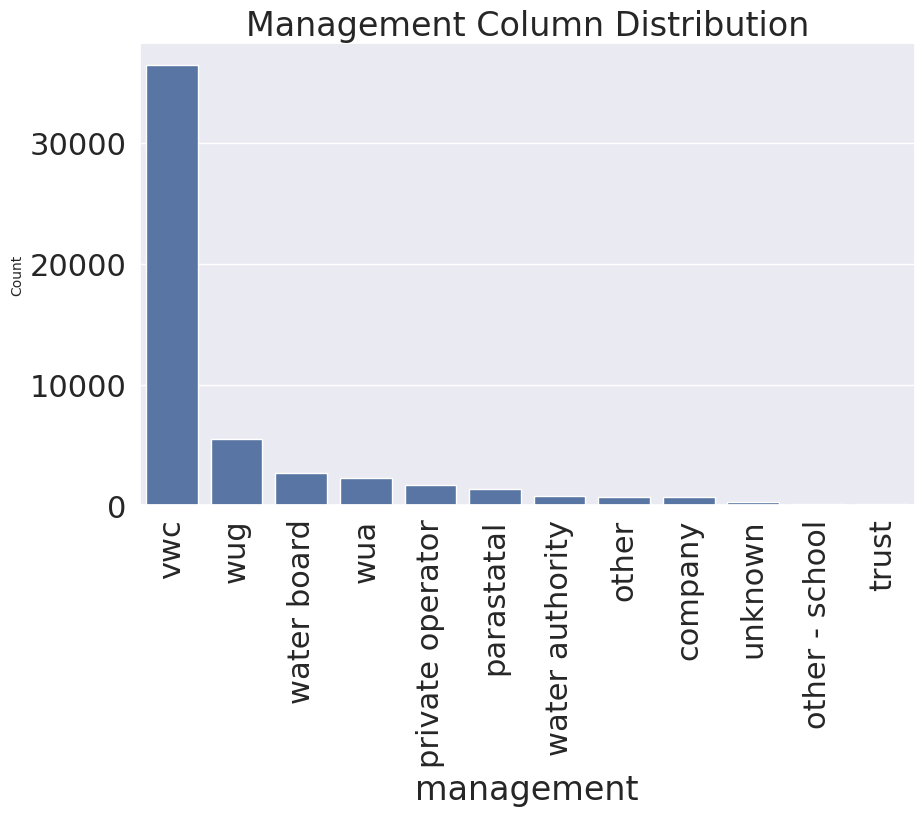

In [36]:
plot_data(df, 'management', 'Management Column Distribution')

We can conclude that most wells are managed by vwc

Extraction Type Distribution

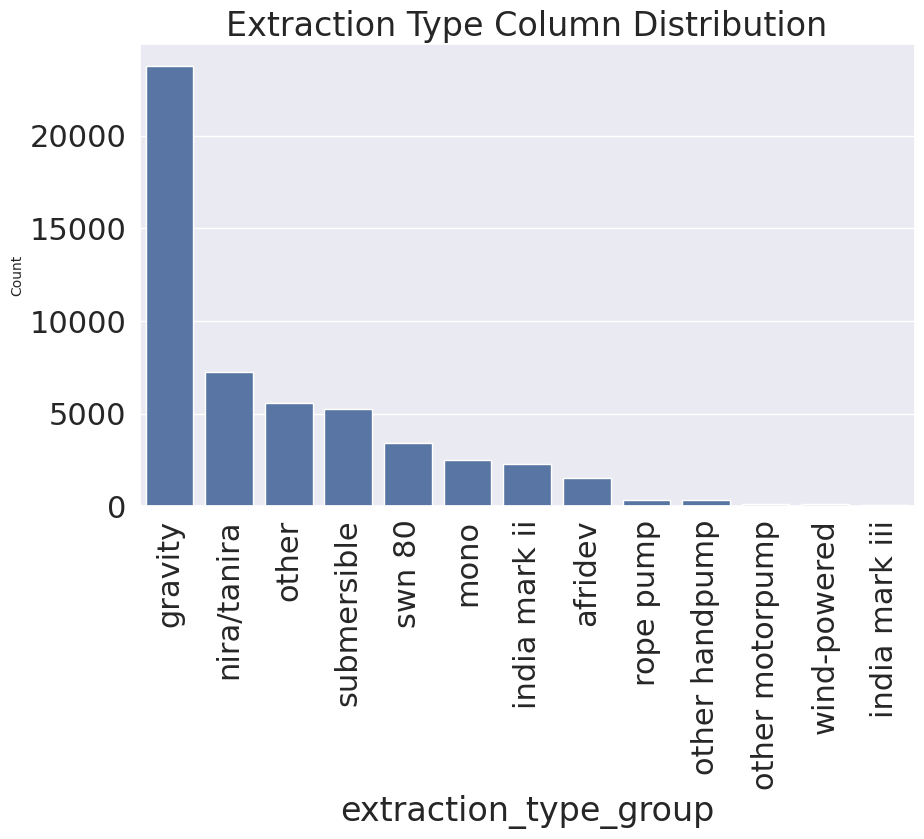

In [37]:
plot_data(df, 'extraction_type_group', 'Extraction Type Column Distribution')

We can conclude that the region mainly extracts its water using gravity

Payment Type Distribution

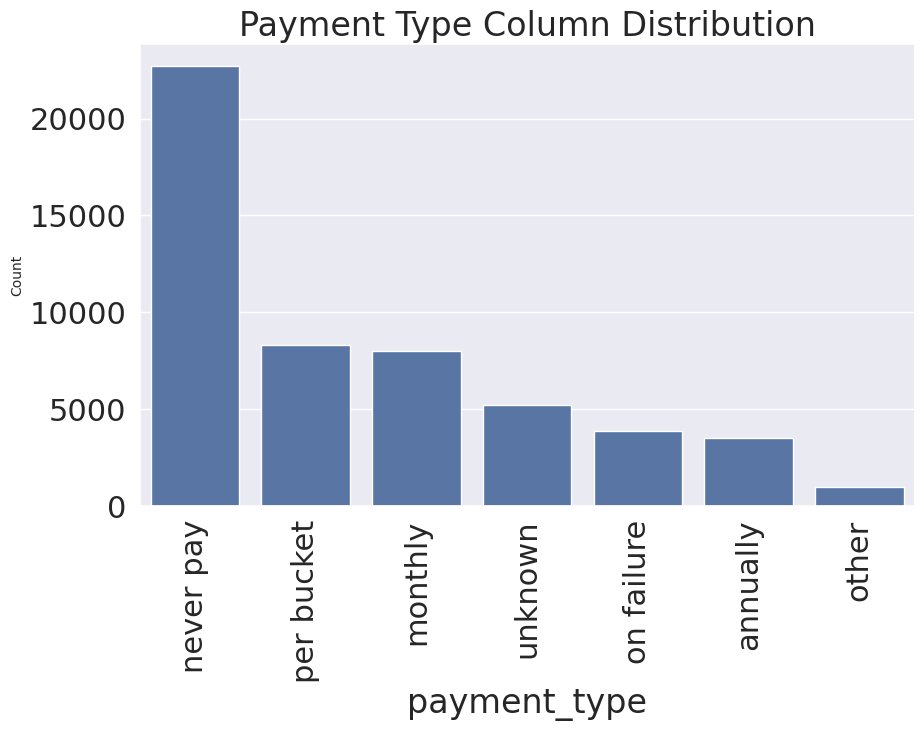

In [38]:
plot_data(df, 'payment_type', 'Payment Type Column Distribution')

we can conclude that a large number of people never pay for using water wells to pump water

Water Quality Distribution

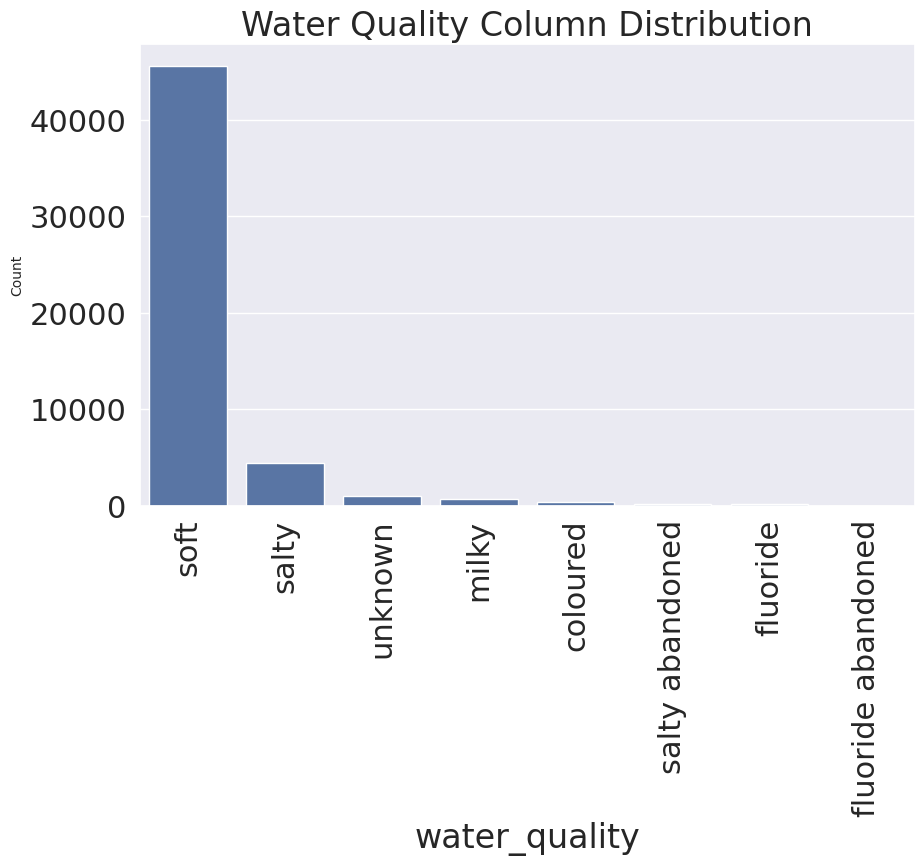

In [39]:
plot_data(df, 'water_quality', 'Water Quality Column Distribution')

We can conclude that most communities in tanzania consume soft water and excessive amounts of the salts can cause health risks

Quantity Distribution

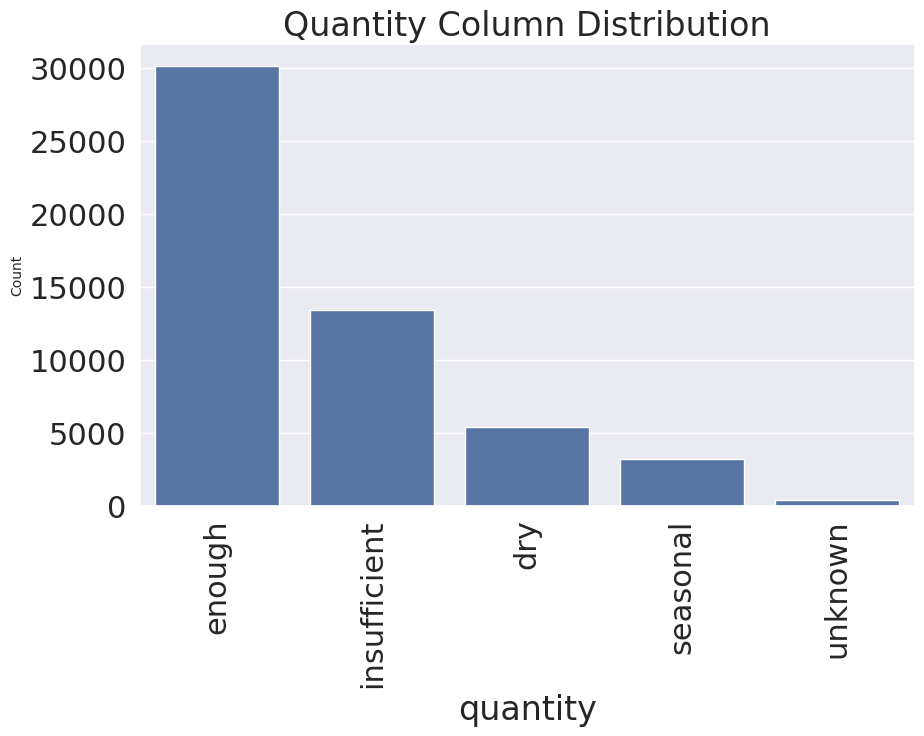

In [40]:
plot_data(df, 'quantity', 'Quantity Column Distribution')

We can conclude that most communities in Tanzania have enough water to sustain them

Pie Chart Showing Distribution of status group

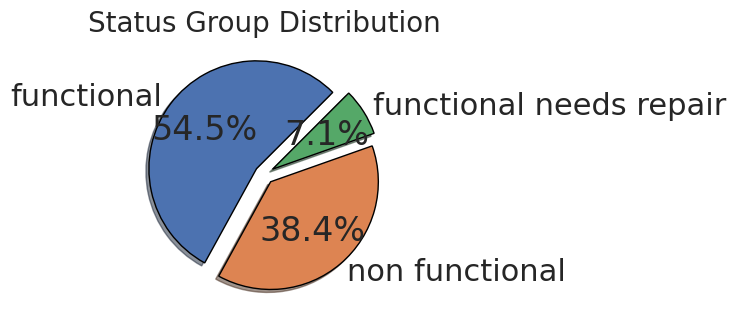

In [41]:
slices = df['status_group'].value_counts().values

labels = df['status_group'].value_counts().index

explode = [0.09, 0.09, 0.09]

plt.pie(slices, labels=labels, wedgeprops={'edgecolor': 'black'}, explode=explode, shadow=True, autopct='%1.1f%%', startangle=45)

plt.title('Status Group Distribution', fontsize = 20)
plt.tight_layout()
plt.show()

We can conclude that from this pie chart approximately 54.8% of the water pumps are functional,7.1% are functional but need repair and 38.1% are non functional

Amount Total Static Head Distribution

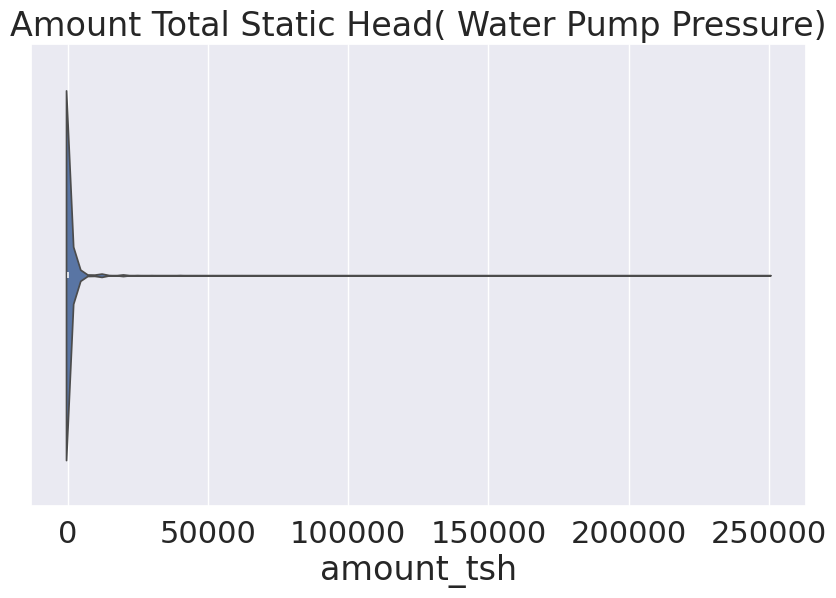

In [42]:
plt.figure(figsize=(10, 6))
ax = sns.violinplot(x=df['amount_tsh'])
plt.title('Amount Total Static Head( Water Pump Pressure)')
plt.show()

A violin plot is a visualization that combines the elements of a box plot and a density plot. It shows the distribution of the data with a kernel density estimation overlaying the box plot. This allows you to see not only the spread of the data (quartiles, outliers) but also its overall shape (skewness, density).
By looking at this plot, we can conclude The total static head as described previously refers to the water pump pressure, it indicates the height at which a water pump can raise water. This is a strong indication of water point availability. Total Static Head of zero would mean the water pump cannot raise any water , this can alternatively mean that initially there was a water pump at the location however at the moment its not functional or it could mean that there is no well from which to pump water from.This brings up the assumption that maybe a total static head of 0 indicates a missing value since it would be quite pointless to have a water pump that cannot raise any water or it could indicate that we initially had a functioning water pump but its no longer working therefore it cannot raise any water

Population Distribution

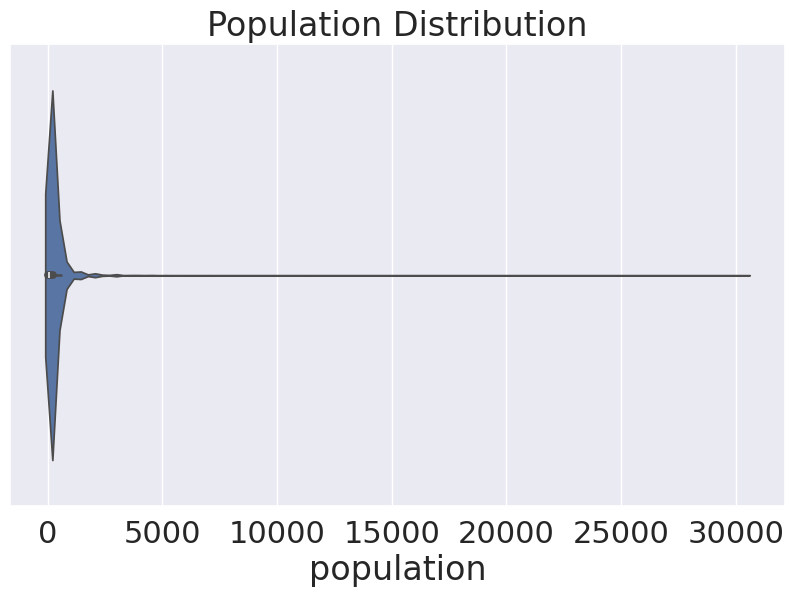

In [43]:
plt.figure(figsize=(10, 6))
ax = sns.violinplot(x=df['population'])
plt.title('Population Distribution')
plt.show()

as we had seen before in the overview that 61% have basic water access and from the plot we can be able to see low population around water well represented by zero

Altitude of the wells(gps_height)Distribution

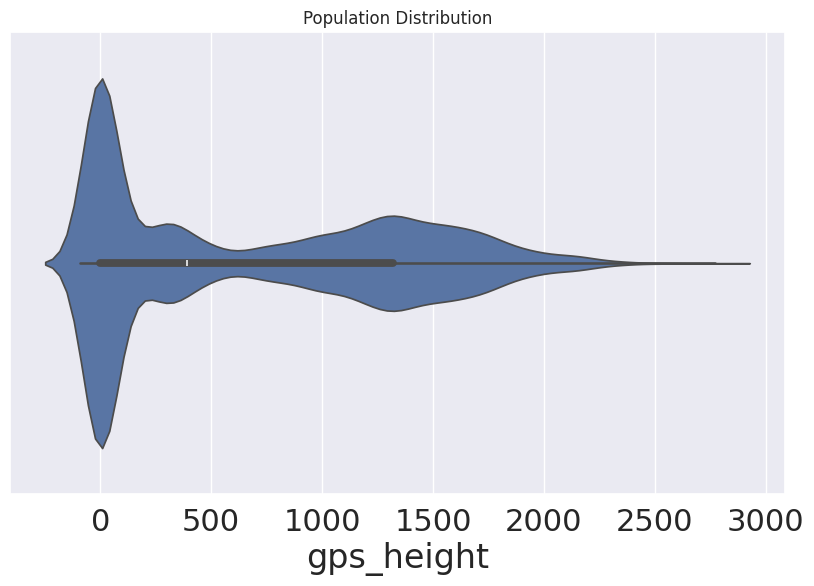

In [44]:
plt.figure(figsize=(10, 6))
ax = sns.violinplot(x=df['gps_height'])
sns.set_theme(style="darkgrid")
plt.title('Population Distribution')
plt.show()

we can conclude tanzania which has an average elevation of 1018 meters above sea level,this simply means that the wells altitude should be approximately the same or slightly lower

#Bivariate Analysis

Basin vs Status Group

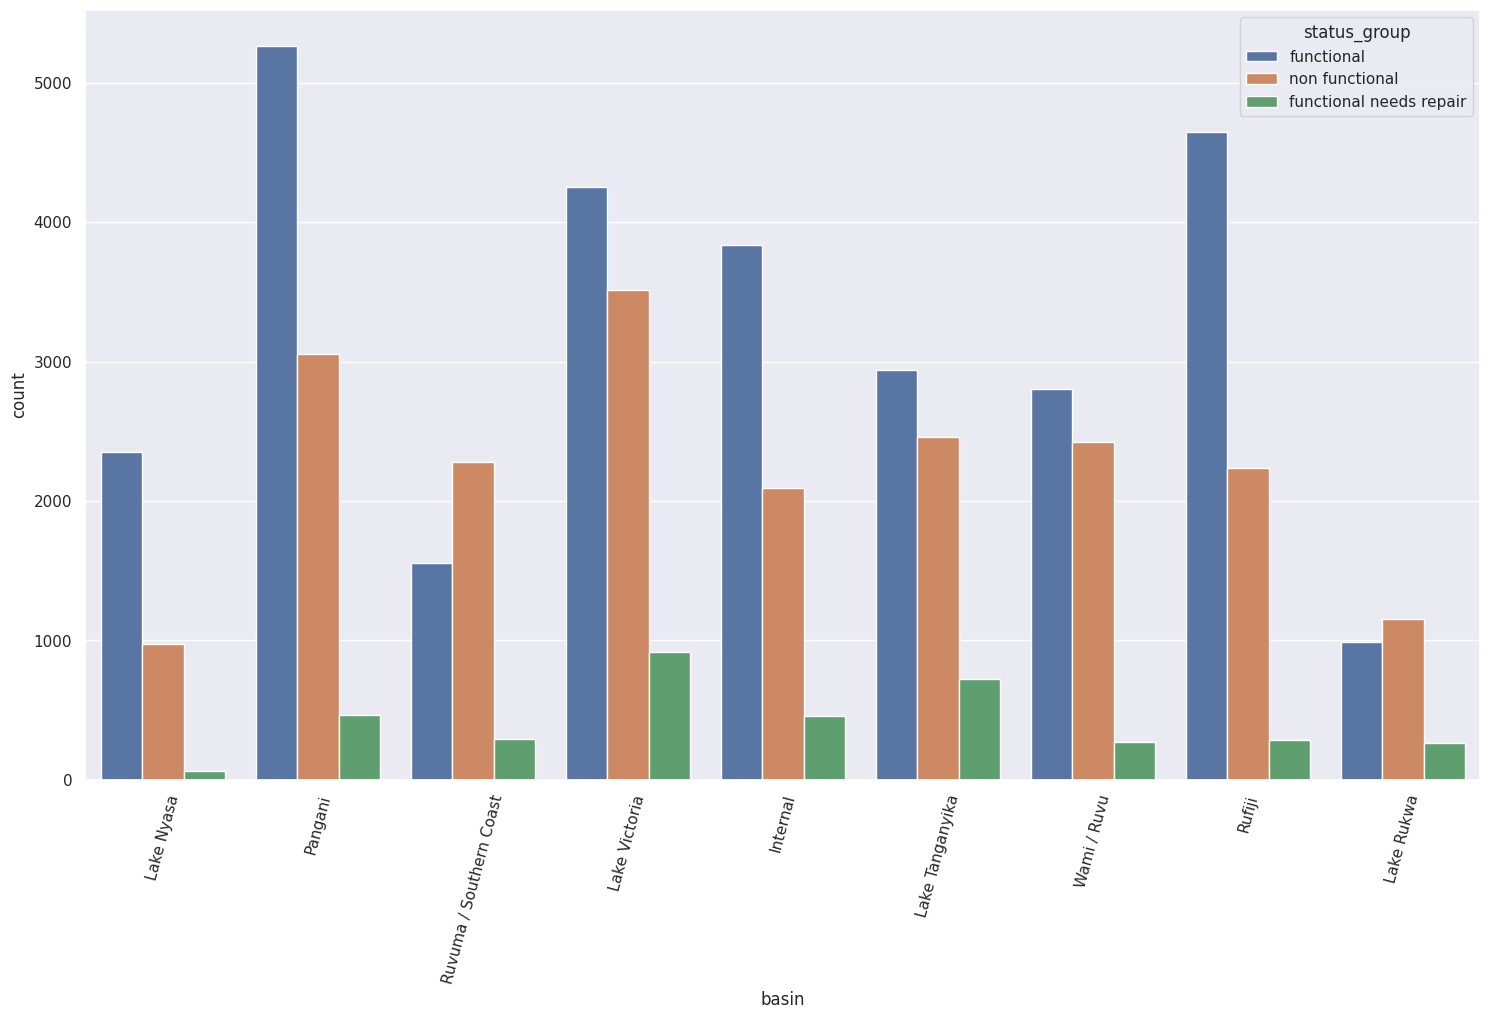

In [45]:
plt.figure(figsize=(18,10))
ax = sns.countplot(x='basin', hue="status_group", data=df)
plt.xticks(rotation=75);

From the two we can conclude that pangani basin has the most functional water wells while Lake Victoria contains mostly non functioning water wells

Region Vs Status Group

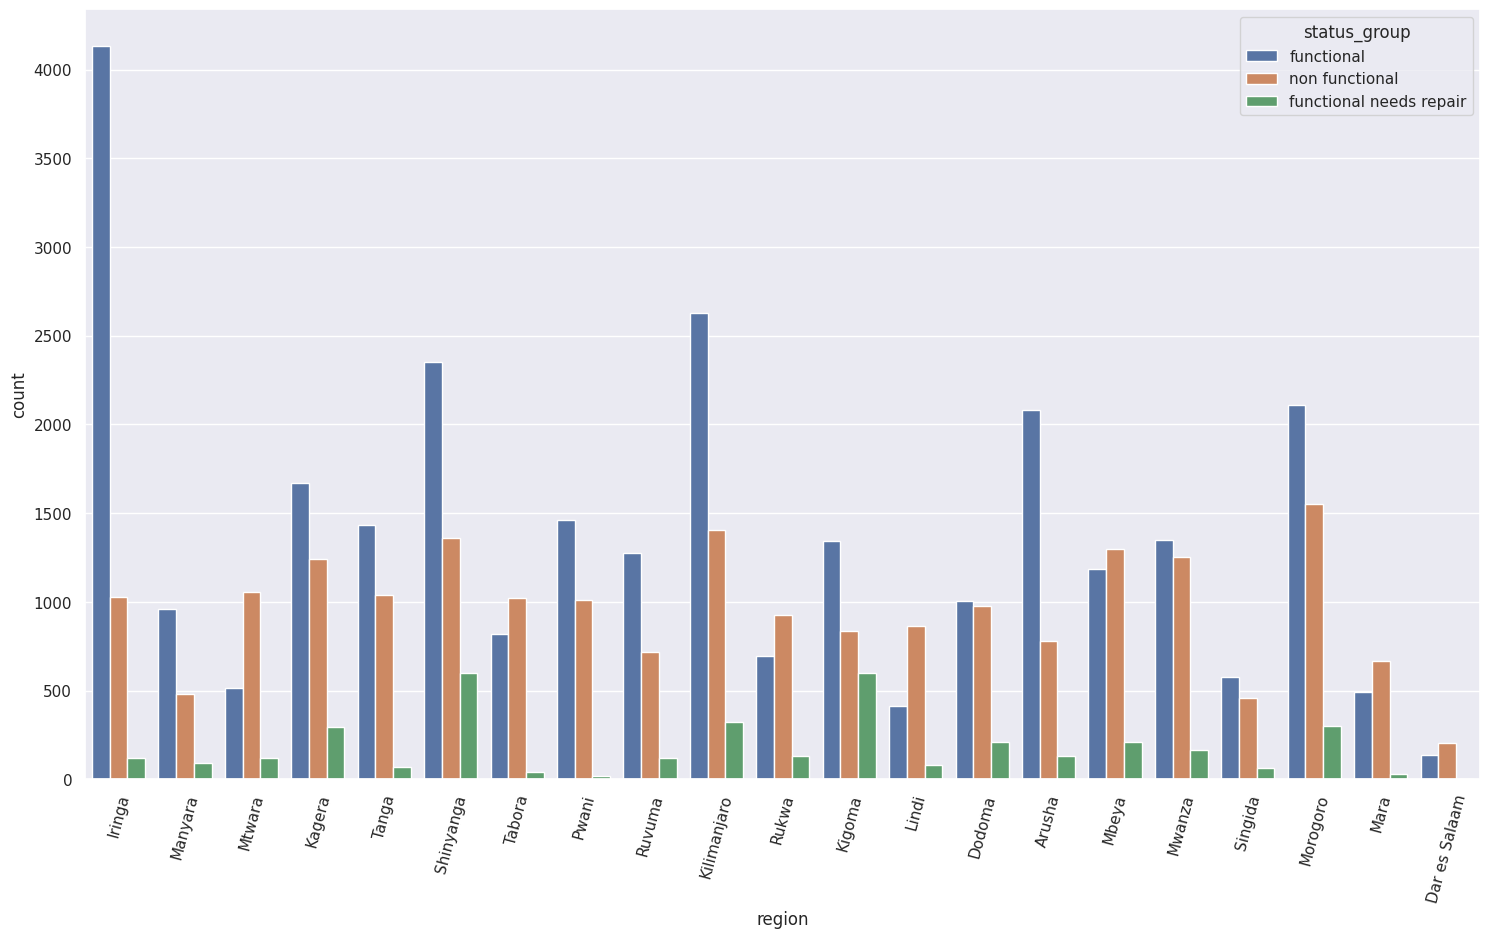

In [46]:
plt.figure(figsize=(18,10))
ax = sns.countplot(x='region', hue="status_group", data=df)
plt.xticks(rotation=75);

We can conclude that Iringa region in Tanzania most functional water wells while daresalam region has the most non functional water wells

Public Meetings vs Status Group

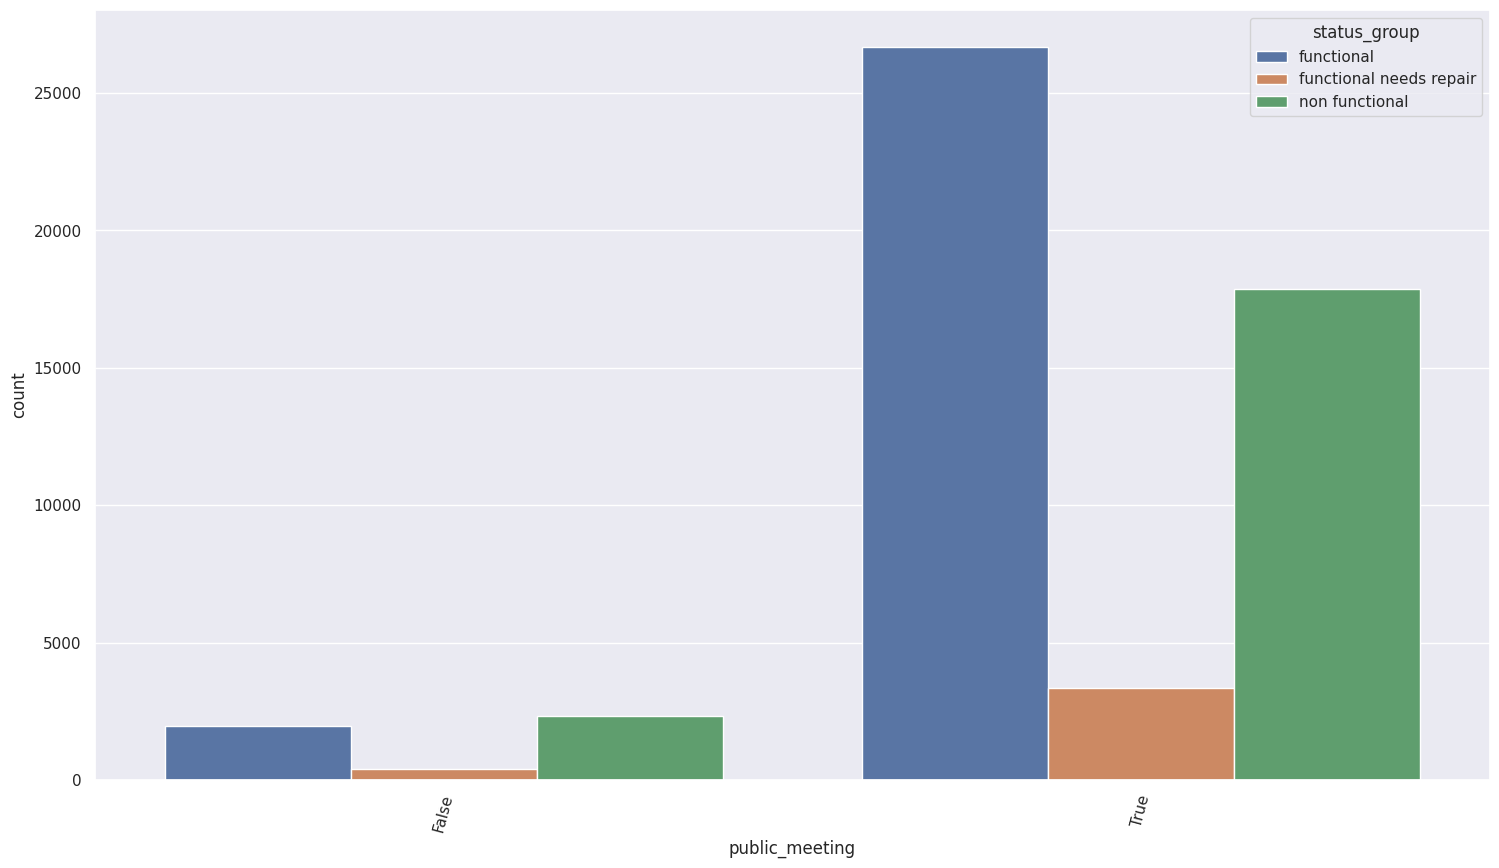

In [47]:
plt.figure(figsize=(18,10))
ax = sns.countplot(x='public_meeting', hue="status_group", data=df)
plt.xticks(rotation=75);

we can conclude that communities that present their grievances seem to have more function water well than those communities that  do present their grievances

Basin vs Quantity

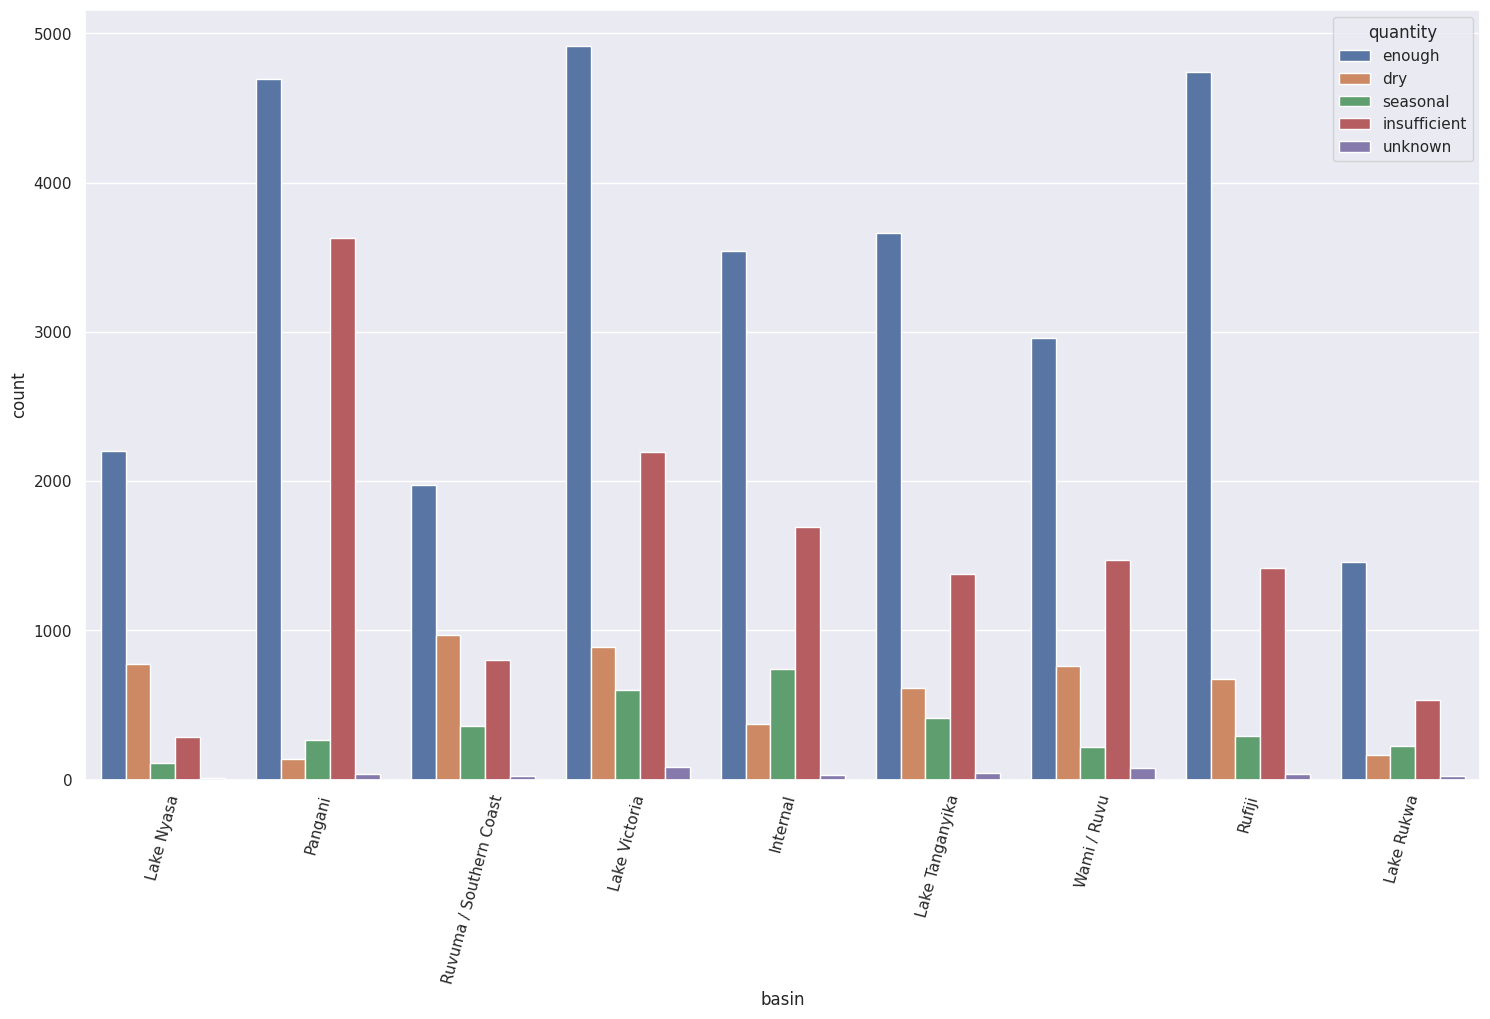

In [48]:
plt.figure(figsize=(18,10))
ax = sns.countplot(x='basin', hue="quantity", data=df)
plt.xticks(rotation=75);

We can conclude that Lake Victoria has the most quantity folowed closely bt river rufiji and then pangani river comes in third

Quantity vs functionality

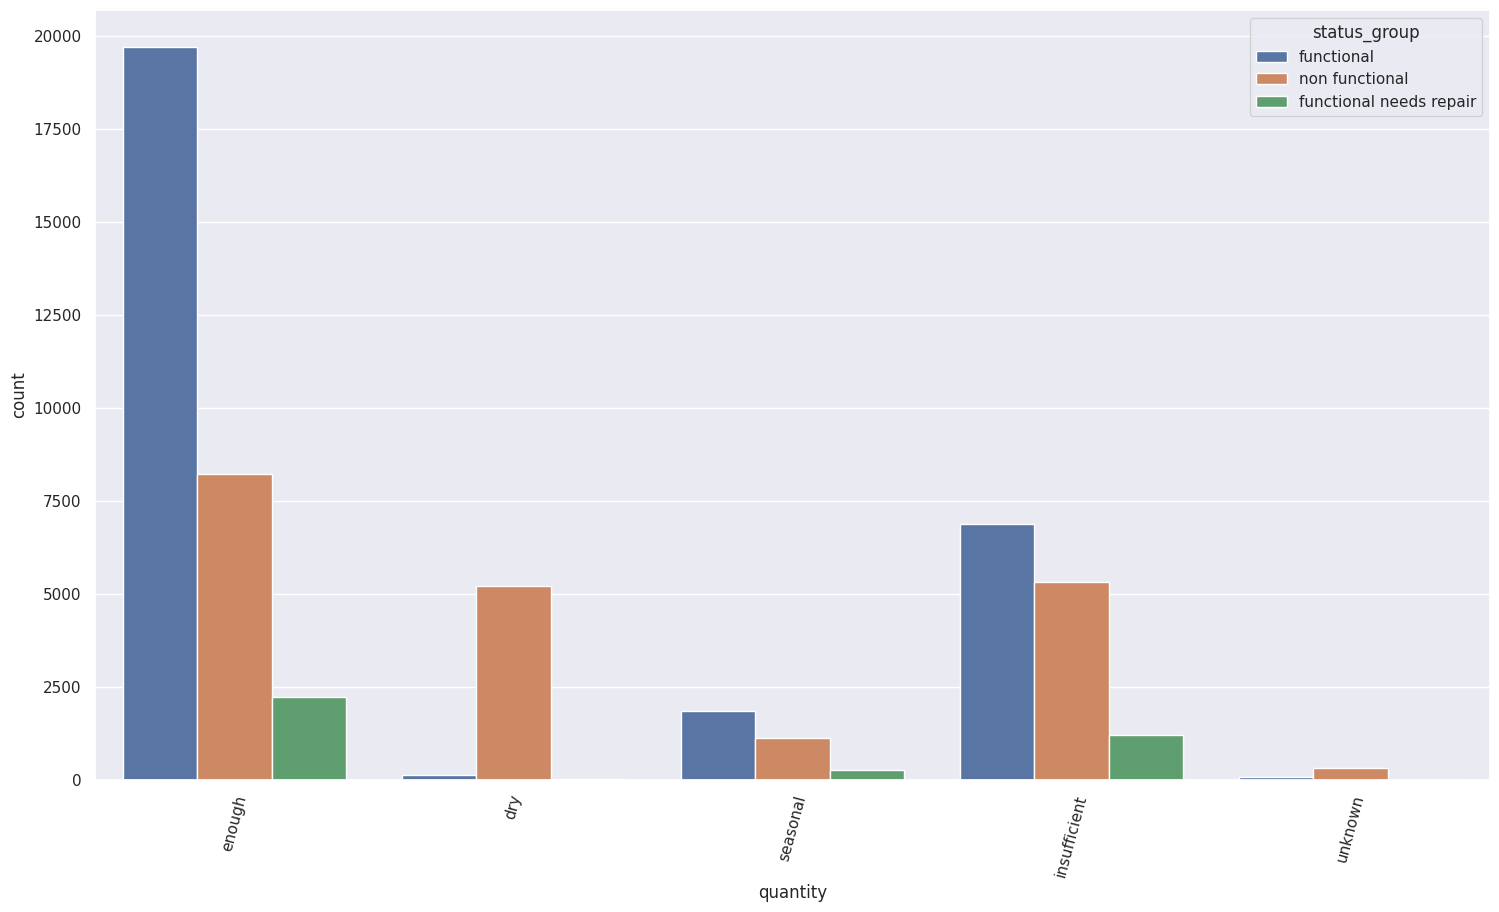

In [49]:
plt.figure(figsize=(18,10))
ax = sns.countplot(x='quantity', hue="status_group", data=df)
plt.xticks(rotation=75);

We can conclude that the more water quantity the more functional the wells are

Water Point vs status group

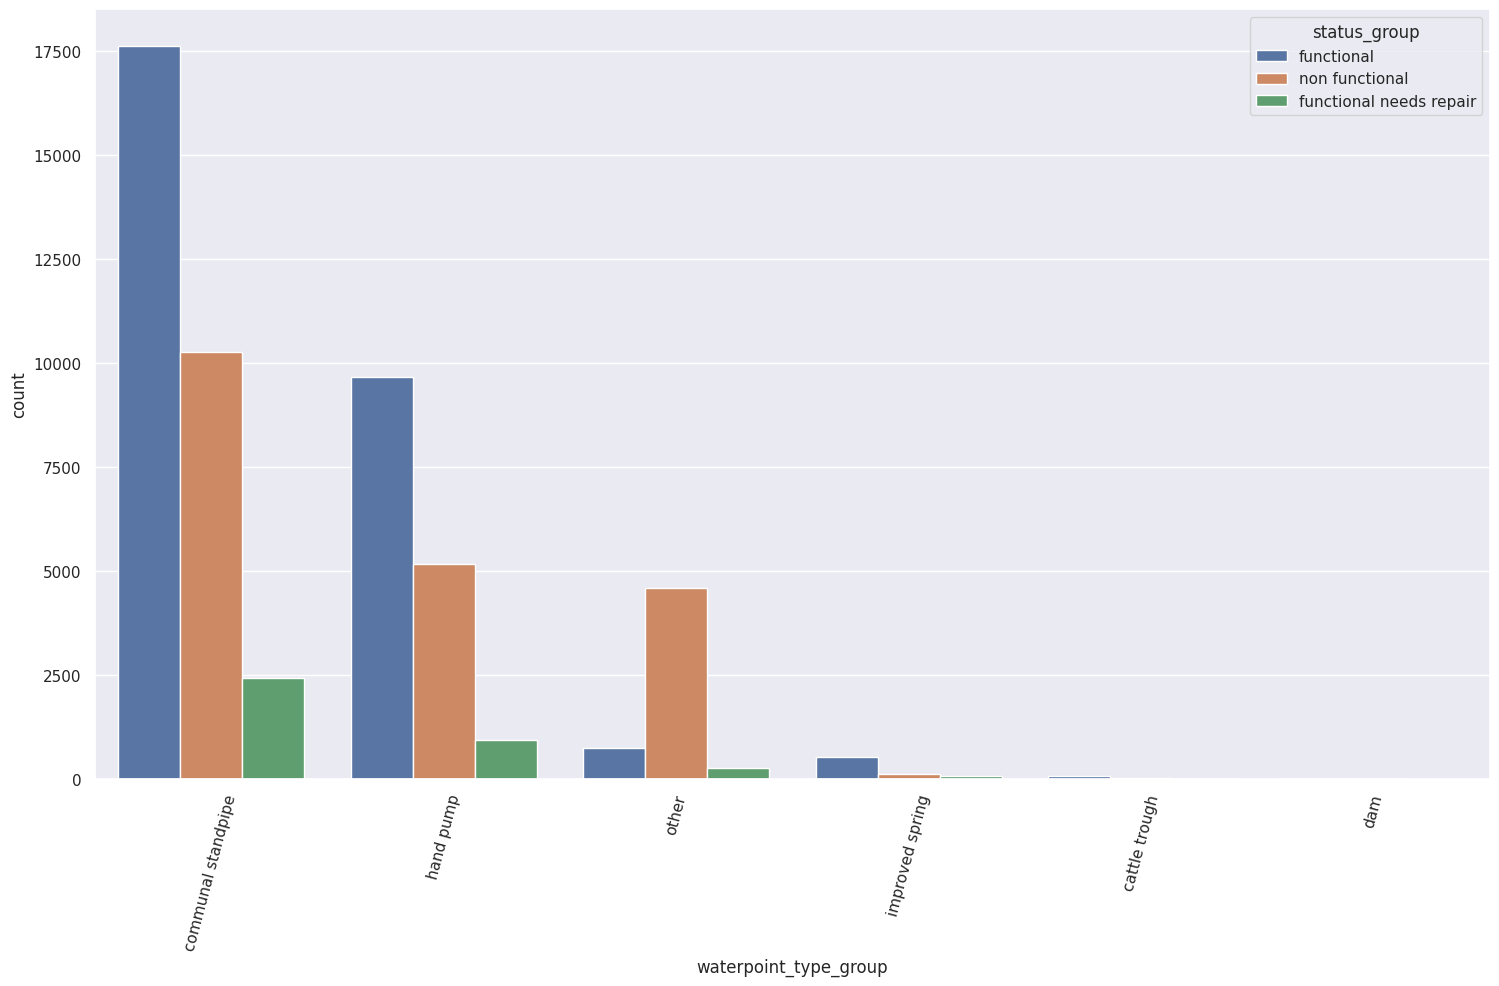

In [50]:
plt.figure(figsize=(18,10))
ax = sns.countplot(x='waterpoint_type_group', hue="status_group", data=df)
plt.xticks(rotation=75);

We can conclude that communal standpipes seem to be having most functional water wells as opposed to cattle trough and dams

Payment vs Functionality

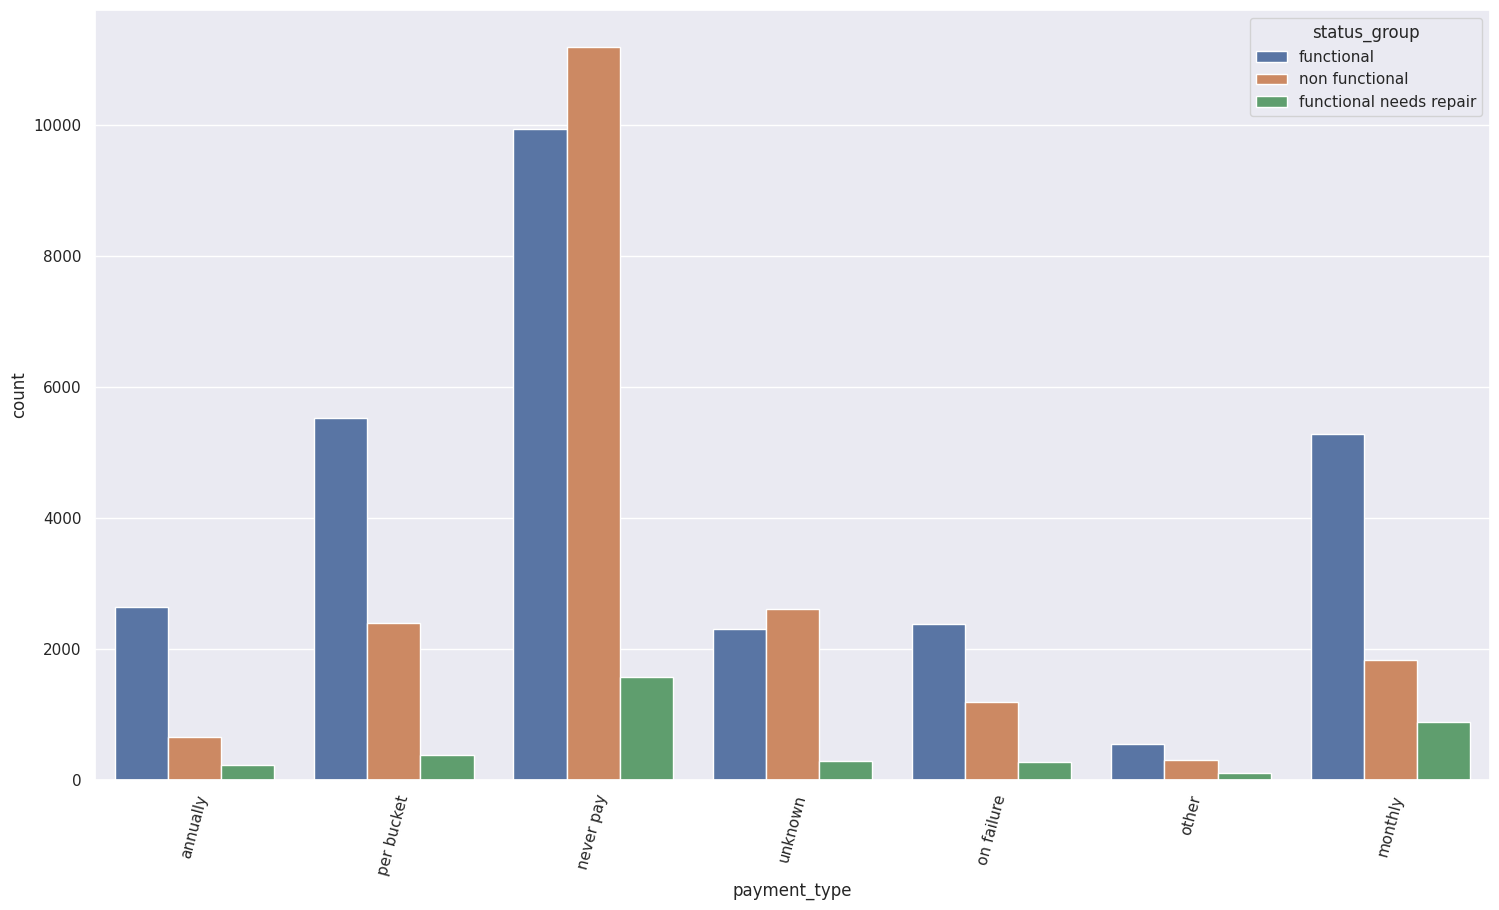

In [51]:
plt.figure(figsize=(18,10))
ax = sns.countplot(x='payment_type', hue="status_group", data=df)
plt.xticks(rotation=75);

wwe can conclude that since this is a communal thing most of the functional and non functional water pumps are never paid for

Management vs Status Group

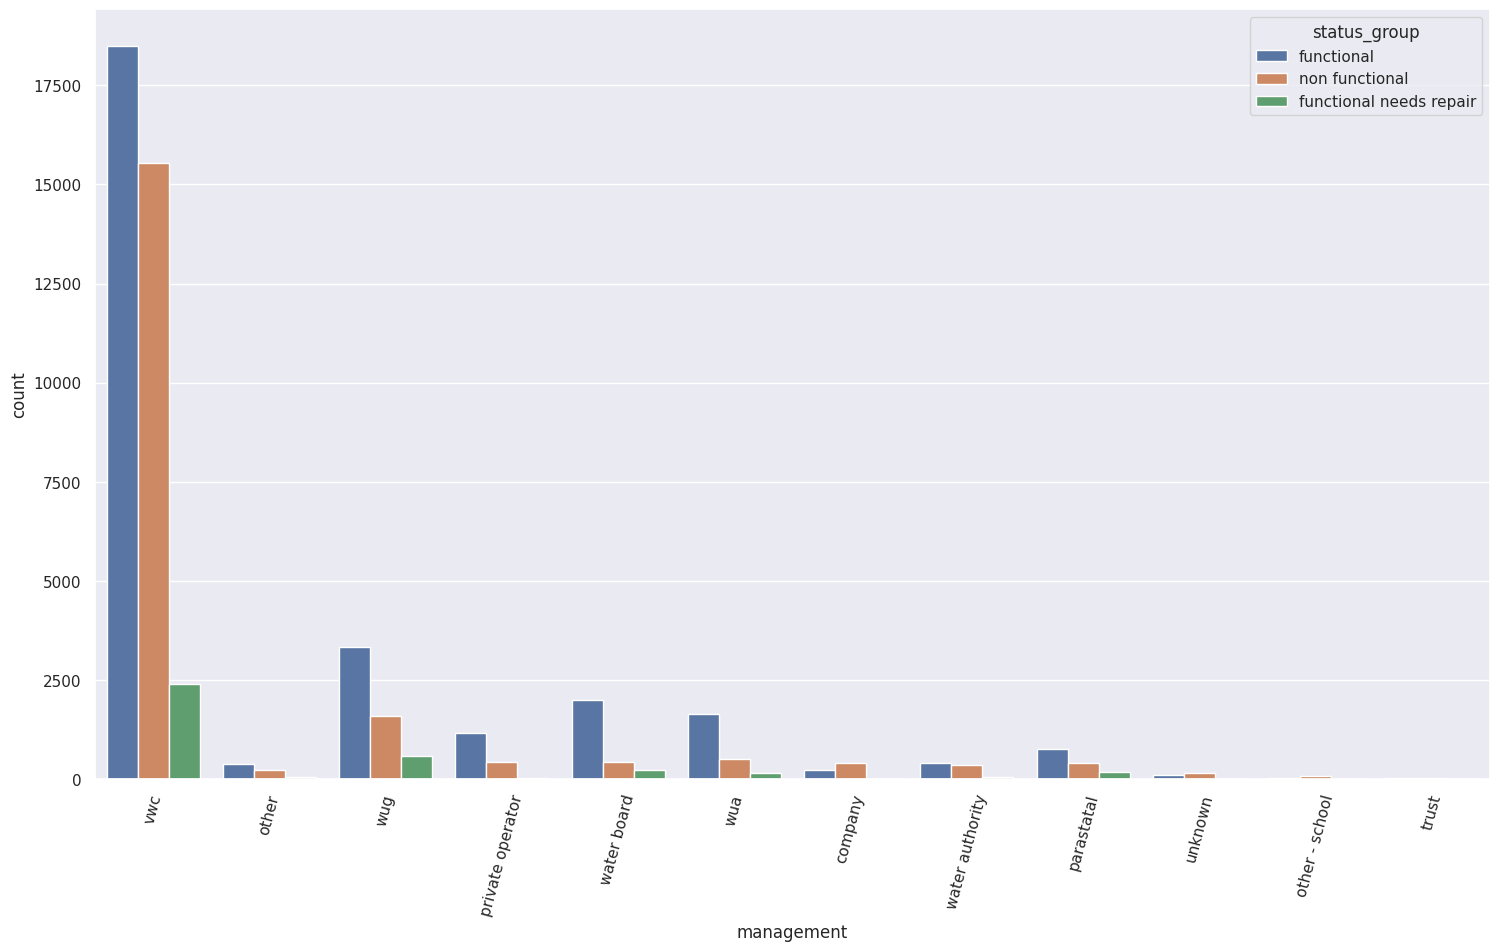

In [52]:
plt.figure(figsize=(18,10))
ax = sns.countplot(x='management', hue="status_group", data=df)
plt.xticks(rotation=75);

we can  conclude that when it comes to management vwc seems to be dominating the management of most wells in Tanzania

#Modelling

The next main objective will be to make predictions on whehter the water pupms are functional,non functional or functional but needs repair based on the features that are on the dataset.this taks is to be achieved by evaliuating different algorithms and checking to see whether they meet the evaluation metrics

when we will be doing evaluation the following are the algorythms which we will use

1.K-Nearest neighbors which is an effective and regression algorithm that uses nearby points to generate prediction

2.Decision Trees-which are used to classify or estimate contionous values by partitioning the sample space as efficiently as possible into sets with similar data points until you get to or close to a homogenous set and can reasonably predict the value for new data points

3.Random Forest-this algorithm works by creating a number of Decision Trees during the training phase

4.Gradient Boosting-this is a more advanced algorithm that checks the learners performance,identify examples that it got right and wrong


Let's go ahead and pre-process our data to have it ready for modelling

 We will not be using all the columns in our cleaned dataset to perform modelling, only the ones that we think will be relevant and these include :

1.basin

2.public meeting

3.management

4.water quality

5.quantity

6.source type

7.amount_tsh

8.status group


Numeric Representation of the statues group column

In [53]:
tally(df.status_group)

status_group
functional                 28643
non functional             20188
functional needs repair     3729
Name: count, dtype: int64

In [54]:
#create a copy of the dataframe in that column
df1 = df.copy()

new_status_group = {'non functional':0, 'functional': 1, 'functional needs repair': 2, } # converting string to numerical values

df1['status_group'] = df1['status_group'].replace(new_status_group)

One hot Encoding-

this is used to create dummies and variables

In [55]:
categorical = ['basin', 'public_meeting', 'management', 'water_quality', 'quantity', 'source_type']
ohe = pd.get_dummies(df[categorical], prefix = categorical, drop_first=True )

In [56]:
# combining the one hot encoded dataset with amount_tsh column

new_df = pd.concat([ohe, df1['amount_tsh']], axis = 1)

In [57]:
# Defining x and y
X = new_df
y = df1['status_group']

# Performing train test and split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

K-Nearest Neighbors

In [58]:
# create a pipeline

pipe_1 = Pipeline([('ss', StandardScaler()),
                ('neighbors', KNeighborsClassifier())])

# fit the training data

pipe_1.fit(X_train, y_train)

#predict on test data

y_pred_1 = pipe_1.predict(X_test)

Model Evaluation

In [59]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds, average='weighted')))
    print("Recall Score: {}".format(recall_score(labels, preds, average='weighted')))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds, average='weighted')))

print_metrics(y_test, y_pred_1)

Precision Score: 0.6568846419296405
Recall Score: 0.6738013698630136
Accuracy Score: 0.6738013698630136
F1 Score: 0.658177773115424


Caluculating the root mean squared error of the model

In [60]:

RMSE = round(mean_squared_error(y_test, y_pred_1, squared = False ), 2)

print(f"Our model has a {RMSE} chance of making an error")

Our model has a 0.62 chance of making an error


Decision Trees

In [61]:
# create a pipeline

pipe_2 = Pipeline([('mms', MinMaxScaler()),
                ('tree', DecisionTreeClassifier(random_state=42))])

# fit the training data

pipe_2.fit(X_train, y_train)

#predict on test data

y_pred_2 = pipe_2.predict(X_test)

Model Evaluation

In [62]:
print_metrics(y_test, y_pred_2)

Precision Score: 0.69955039163471
Recall Score: 0.709855403348554
Accuracy Score: 0.709855403348554
F1 Score: 0.6912111267183861


Calculating the RMSE

In [63]:
RMSE = round(mean_squared_error(y_test, y_pred_2, squared = False ), 2)

print(f"Our model has a {RMSE} chance of making an error")

Our model has a 0.58 chance of making an error


Random Forest

In [64]:
pipe_3 = Pipeline([('forest', RandomForestClassifier())])

# create a grid parameter

grid = {'forest__criterion' : ['gini', 'entropy'],
        'forest__max_depth': [6,7],
        'forest__max_features': [1.0],
        'forest__n_estimators':[100, 200]}

# creating grid with pipe as the estimator

gridsearch = GridSearchCV(estimator=pipe_3,
                        param_grid=grid,
                        scoring='accuracy',
                        cv=5)

# fit training data using grid search

gridsearch.fit(X_train, y_train)

# predict using grid search on test data

y_pred_3 = gridsearch.predict(X_test)

Model Evaluation

In [65]:
print_metrics(y_test, y_pred_3)

Precision Score: 0.6871200662041241
Recall Score: 0.6829337899543378
Accuracy Score: 0.6829337899543378
F1 Score: 0.6530650851188476


Root Mean Squared Erorr

In [66]:
RMSE = round(mean_squared_error(y_test, y_pred_3, squared = False ), 2)

print(f"Our model has a {RMSE} chance of making an error")

Our model has a 0.6 chance of making an error


Feature Importance



this will be used to calculate a score for the input features in the model and the higher the score the specific feature will have a larger effect on the model that is being used to predict a certain variable

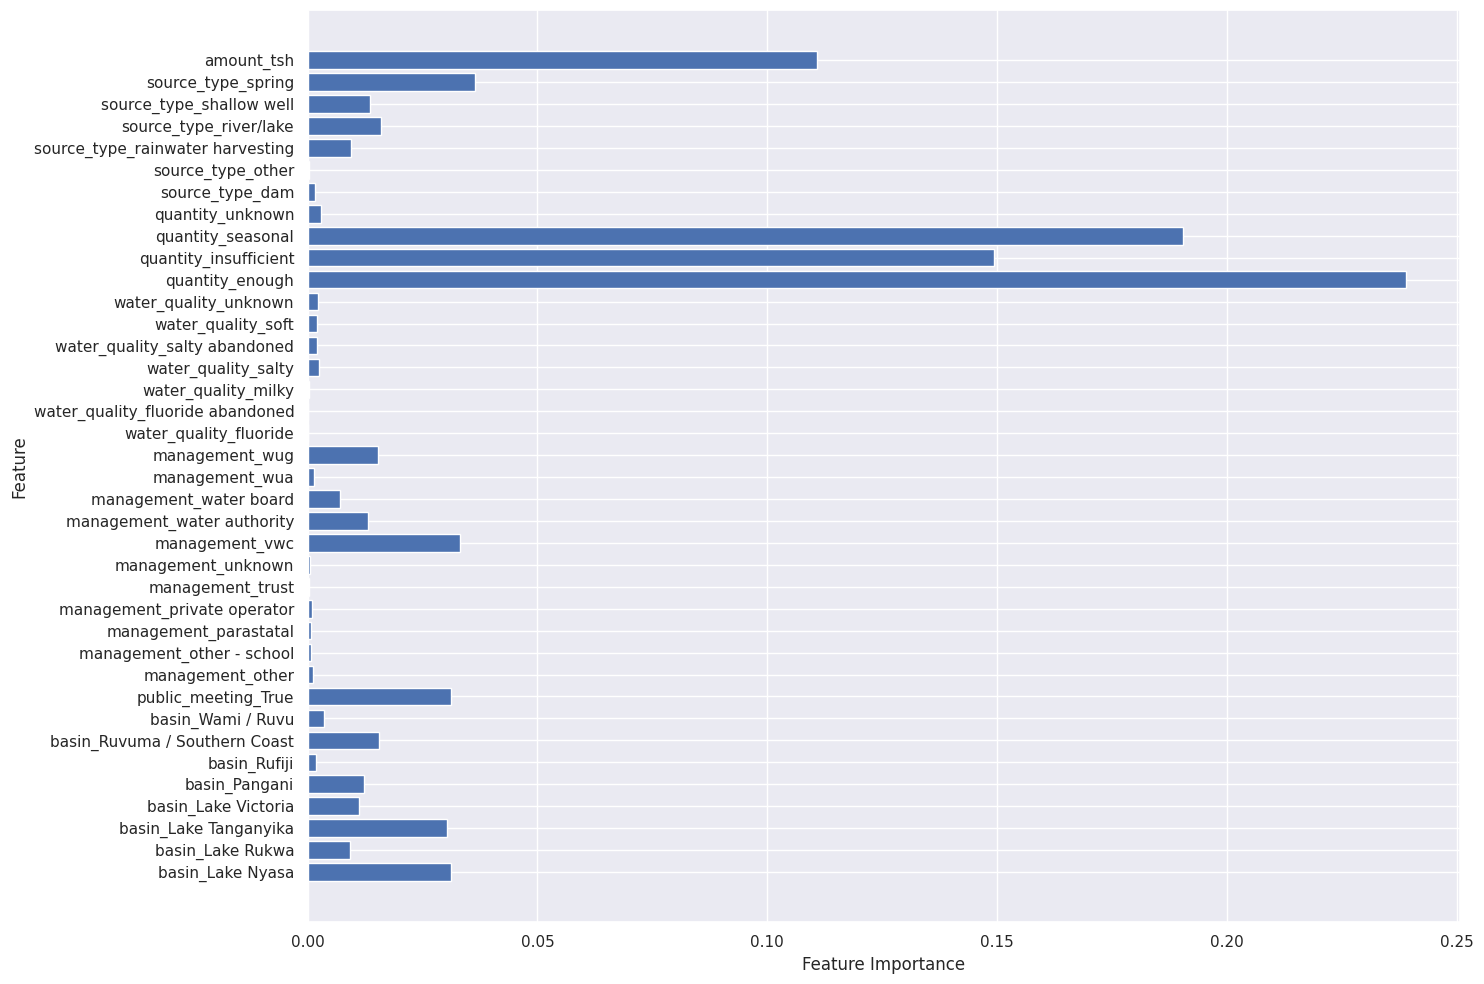

In [67]:
def plot_feature_importances(model, X_train):
    if isinstance(model, Pipeline):
        last_step = model.steps[-1][1]
        if hasattr(last_step, 'feature_importances_'):
            n_features = X_train.shape[1]
            plt.figure(figsize=(15, 10))
            plt.barh(range(n_features), last_step.feature_importances_, align='center')
            plt.yticks(np.arange(n_features), X_train.columns.values)
            plt.xlabel('Feature Importance')
            plt.ylabel('Feature')
            plt.tight_layout()
            return
    print("Error: The model does not have feature importances.")

plot_feature_importances(gridsearch.best_estimator_, X_train)

#Model Evaluation

I used a pipeline to scale the data and then fit it to the model,and
despite the fact that the models did not achieve the desired accuracy of 75%, i was  able to achieve an accuracy of 70% which is a good start for the  project and is within an acceptable range of +/- 5% as I had also  set a recall and accuracy score of 70% + for our model,  The root mean squared error was to check for the models efficiency which was also close to 0.

#Recomendations




1. Lake Victoria has the most non functional wells yet its one of the largest water bodies in the region. The UN Habitat should perform an excursion on the region and check to see the reason why so and perhaps formulate a plan to solve that.

2. Features such as amount_tsh (water pump pressure ) and quantity of water are key indicators of water pump functionality, The organization should use these features to decide on whether a water pump is functional.


3.The UN-Habitat should partner with the government to ensure efficient pulling of funds such as to raise enough capital to push the initiative.


 If the UN Habitat would also look into access to water supply in urban areas for their initiave in addition to fixing and building their water pumps then they would be making tremendous contribution towards their 2030 Agenda to  achieve their Sustainable Development Goals.

#Conclusion

The model did well with continous training but with more and updated data it can make wonderful predictions and improve on its performance